# DFBA Simulation Diauxic Growth
Simulation of the diauxic growth model.

In [1]:
from __future__ import print_function, division

import os
import timeit
import pandas as pd
from pprint import pprint
from matplotlib import pylab as plt

from sbmlutils.dfba.simulator import Simulator

# global settings for plots
plt.rcParams.update({
        'axes.labelsize': 'large', 
        'axes.labelweight': 'bold',
        'axes.titlesize': 'large',
        'axes.titleweight': 'bold',
        'legend.fontsize': 'small',
        'xtick.labelsize': 'large',
        'ytick.labelsize': 'large',
    })
out_dir = './results/'
print(os.getcwd())

/home/mkoenig/git/sbmlutils/sbmlutils/dfba/diauxic_growth


## Load model in simulator

In [4]:
from sbmlutils.dfba.diauxic_growth.model_factory import version
sbml_path = os.path.join(os.getcwd(), 'results/v{}/diauxic_top.xml'.format(version))
print(sbml_path)
sim = Simulator(sbml_top_path=sbml_path)

* _process_top
* _process_models
--------------------------------------------------------------------------------
<Model diauxic_top "Top level model"> [ode]
--------------------------------------------------------------------------------
fba        : [<Submodel fba>]
ode        : [<Submodel bounds>, <Submodel update>]
stochastic : []
logical    : []
fba rules  :
             dummy_vAc <-> vAc
             dummy_vGlcxt <-> vGlcxt
             dummy_vO2 <-> vO2
             dummy_vX <-> vX

<Submodel fba> diauxic_fba.xml
	FBA rules           : {}
	ub parameters       : defaultdict(<type 'list'>, {'ub_vO2': ['vO2'], 'ub_vAc': ['vAc'], 'ub': ['vX', 'v1', 'v2', 'v3', 'v4'], 'ub_vGlcxt': ['vGlcxt']})
	lb parameters       : defaultdict(<type 'list'>, {'lb_vO2': ['vO2'], 'lb_vAc': ['vAc'], 'lb_vGlcxt': ['vGlcxt'], 'lb_irrev': ['vX', 'v1', 'v2', 'v3', 'v4']})
	ub replacements     : ['ub_vAc', 'ub_vGlcxt', 'ub_vO2']
	lb replacements     : ['lb_vAc', 'lb_vGlcxt', 'lb_vO2']
	flat mapping        :

/home/mkoenig/git/sbmlutils/sbmlutils/dfba/diauxic_growth/results/v3/diauxic_top.xml


## Simulate model

###########################
# Start Simulation
###########################
--------------------------------------------------------------------------------
Time: 0.0
* FBA set bounds 
	upper: ub_vAc = vAc = 4.0
	upper: ub_vGlcxt = vGlcxt = 14.9791955617
	upper: ub_vO2 = vO2 = 2.1
	lower: lb_vAc = vAc = 0.0
	lower: lb_vGlcxt = vGlcxt = 0.0
	lower: lb_vO2 = vO2 = -2.1
* FBA optimize
	status: optimal
	v1        : 0.06
	v2        : 0.0
	v3        : 0.0
	v4        : 0.195198019802
	vAc       : 0.0
	vGlcxt    : 3.75365792079
	vO2       : 2.1
	vX        : 0.255198019802
* ODE set FBA fluxes
	No flux replacements
* ODE integration
* Copy fluxes in ODE solution
time                        0.000000
[Ac]                        0.400000
[Glcxt]                    10.800000
[O2]                        0.210000
[X]                         0.001000
[dummy_S]                   0.000000
dummy_vAc                   0.000000
dummy_vGlcxt                0.000000
dummy_vO2                   0.000000
dummy_

Simulation time: 0.368553161621


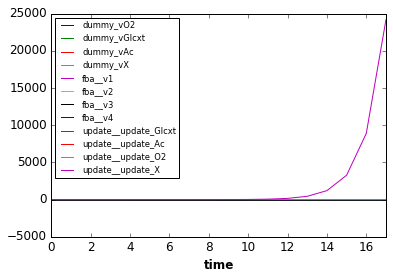

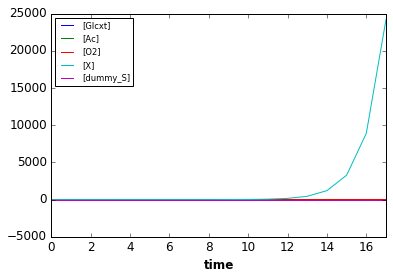

    time          [Ac]       [Glcxt]          [O2]           [X]  [dummy_S]  \
0    0.0  4.000000e-01  1.080000e+01  2.100000e-01      0.001000        0.0   
1    1.0  3.983633e-01  1.079828e+01  2.084313e-01      0.002719        0.0   
2    2.0  3.939152e-01  1.079362e+01  2.041716e-01      0.007391        0.0   
3    3.0  3.818346e-01  1.078094e+01  1.926317e-01      0.020095        0.0   
4    4.0  3.490909e-01  1.074647e+01  1.616073e-01      0.054632        0.0   
5    5.0  2.610163e-01  1.065275e+01  8.143763e-02      0.148523        0.0   
6    6.0  4.222256e-02  1.039801e+01  1.371064e-05      0.403751        0.0   
7    7.0  1.317395e-11  9.705627e+00  4.915177e-16      1.097510        0.0   
8    8.0 -1.331995e-11  7.823671e+00 -4.969649e-16      2.983777        0.0   
9    9.0 -1.466415e-11  2.716940e+00 -5.471159e-16      8.111719        0.0   
10  10.0  7.955788e-32  2.476808e-11  2.968286e-36     22.051487        0.0   
11  11.0  4.138210e-31  1.288318e-10  1.543956e-35  

In [5]:
import logging
logging.getLogger().setLevel(logging.DEBUG)

tend = 100
steps = 100

# reset the model
sim.rr_comp.reset()

start_time = timeit.default_timer()
df = sim.simulate(tstart=0.0, tend=tend, steps=steps)
elapsed = timeit.default_timer() - start_time
print("Simulation time: {}".format(elapsed))

# Create outputs
sim.plot_reactions(filepath=None, df=df, rr_comp=sim.rr_comp)
sim.plot_species(filepath=None, df=df, rr_comp=sim.rr_comp)

print(df)